# Teoria da Busca - RPG Game (Cega e Heuristica)

In [247]:
# Importação de bibliotecas
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

## Criando o Grafo

In [248]:
# Criar os grafos
G_game = nx.Graph()

# Localizações do mapa (grafo)
locais = {
    "Castelo da Peach": (100, 400),
    "Castelo do Bowser": (500, 400),
    "Reino do Cogumelo": (200, 350),
    "Campo Goomba": (300, 300),
    "Fortaleza Koopa": (400, 350),
    "Montanha Yoshi": (150, 250),
    "Ilha Donkey Kong": (450, 250),
    "Cidade Toad": (250, 200),
    "Mansão Boo": (350, 200),
    "Vale das Estrelas": (550, 300),
    "Lago Cheep Cheep": (200, 100),
    "Deserto Shy Guy": (400, 100),
    "Floresta Piranha": (100, 150),
    "Caverna Bob-omb": (300, 50),
    "Observatório Rosalina": (500, 50),
}

In [249]:
# Colocando posições no gráfico
for local, pos in locais.items():
    G_game.add_node(local, pos=pos)

# Calculo do peso a partir das distancias
def calcular_distancia(ponto_a, ponto_b):
    ax, ay = locais[ponto_a]
    bx, by = locais[ponto_b]
    return int(round(((ax-bx)**2 + (ay-by)**2) ** 0.5 / 20)) + 5

# Dicionário de conexões (edges)
edges = [
    ("Castelo da Peach", "Reino do Cogumelo"),
    ("Reino do Cogumelo", "Campo Goomba"),
    ("Campo Goomba", "Fortaleza Koopa"),
    ("Fortaleza Koopa", "Castelo do Bowser"),
    ("Reino do Cogumelo", "Montanha Yoshi"),
    ("Montanha Yoshi", "Floresta Piranha"),
    ("Floresta Piranha", "Lago Cheep Cheep"),
    ("Campo Goomba", "Cidade Toad"),
    ("Cidade Toad", "Mansão Boo"),
    ("Mansão Boo", "Fortaleza Koopa"),
    ("Fortaleza Koopa", "Ilha Donkey Kong"),
    ("Ilha Donkey Kong", "Vale das Estrelas"),
    ("Vale das Estrelas", "Castelo do Bowser"),
    ("Lago Cheep Cheep", "Caverna Bob-omb"),
    ("Caverna Bob-omb", "Deserto Shy Guy"),
    ("Deserto Shy Guy", "Observatório Rosalina"),
    ("Observatório Rosalina", "Castelo do Bowser"),
]

for ponto_a, ponto_b in edges:
    G_game.add_edge(ponto_a, ponto_b, weight=calcular_distancia(ponto_a, ponto_b))

## Função de Plotagem

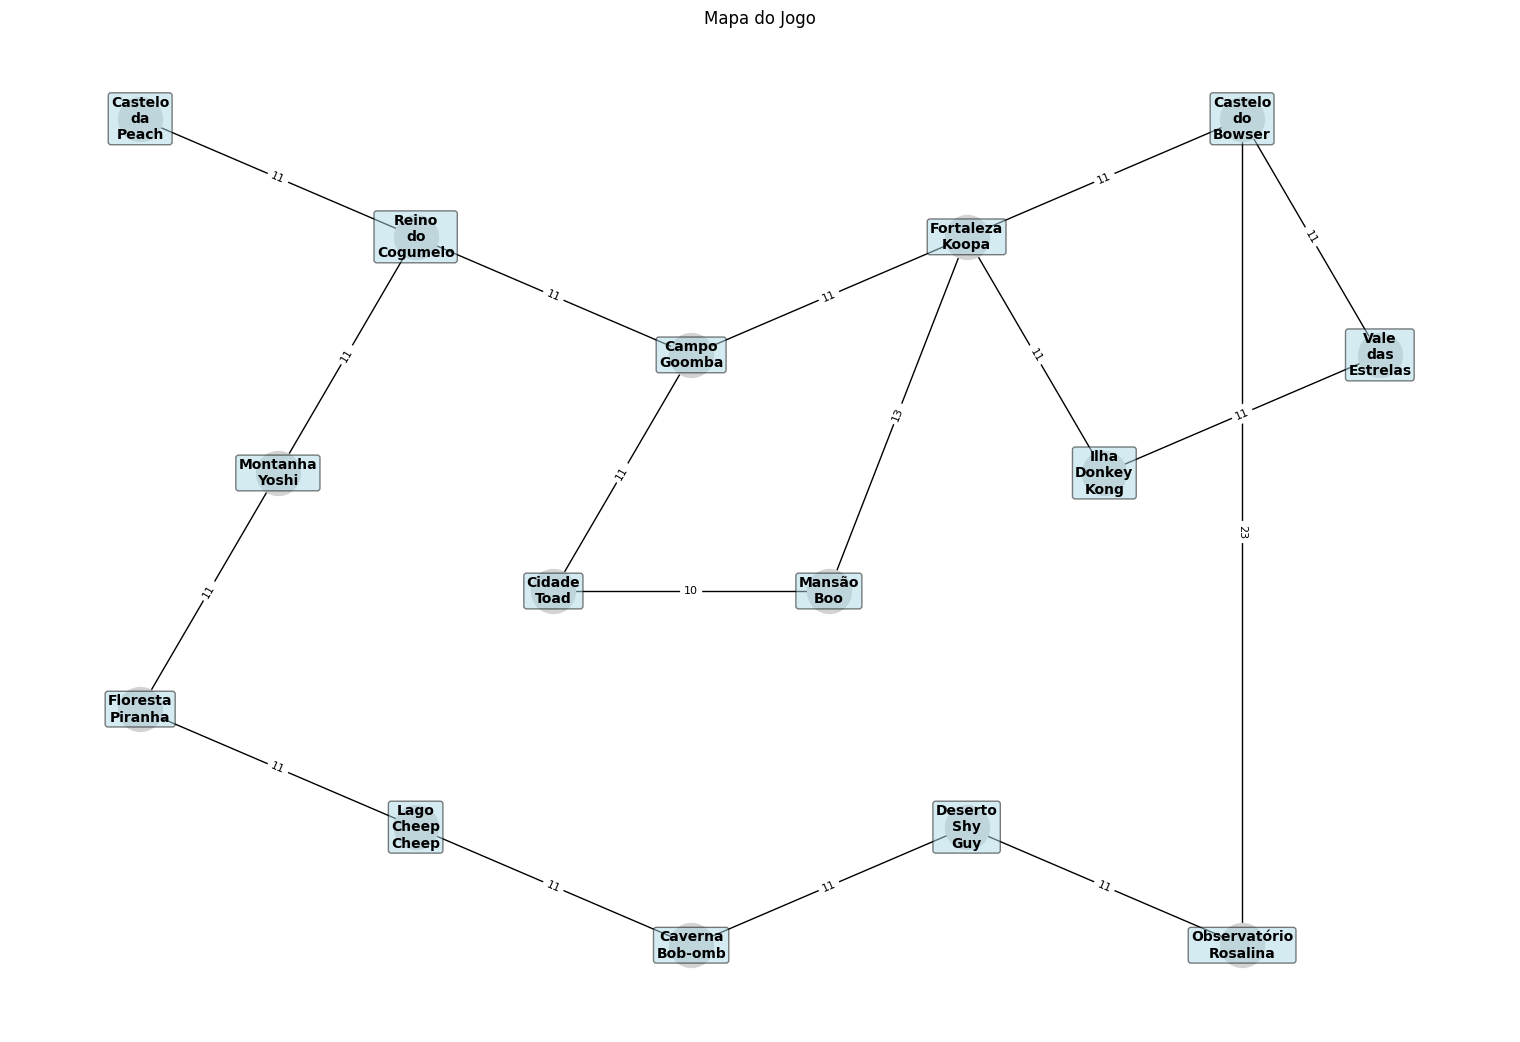

In [250]:
# Função para plotar o mapa (corrigida para lidar com caminhos vazios ou de um nó)
def plot_map(grafo, caminho_encontrado, titulo='Mapa do Jogo'):
    pos = nx.get_node_attributes(grafo, 'pos')
    pesos = nx.get_edge_attributes(grafo, 'weight')

    plt.figure(figsize=(15,10))

    nx.draw(
        grafo, 
        pos, 
        with_labels=True,
        node_size=1000,
        node_color='lightgray',
        font_size=10,
        font_weight='bold',
        labels={node: node.replace(' ', '\n') for node in grafo.nodes()},
        bbox=dict(
            facecolor='lightblue',
            alpha=0.5,
            edgecolor='black',
            boxstyle='round,pad=0.2'
        )
    )
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=pesos, font_size=8, label_pos=0.5)

    if caminho_encontrado and len(caminho_encontrado) > 0:
        # Destacar início e objetivo
        nx.draw_networkx_nodes(
            grafo,
            pos,
            nodelist=[caminho_encontrado[0]],
            node_color='green',
            node_size=700,
            label='Início'
        )
        if len(caminho_encontrado) > 1:
            nx.draw_networkx_nodes(
                grafo,
                pos,
                nodelist=[caminho_encontrado[-1]],
                node_color='purple',
                node_size=700,
                label='Objetivo'
            )
        # Destacar caminho
        nx.draw_networkx_nodes(
            grafo,
            pos,
            nodelist=caminho_encontrado,
            node_color='red',
            node_size=500,
            label='Caminho'
        )
        # Destacar arestas do caminho
        if len(caminho_encontrado) > 1:
            caminho_arestas = list(zip(caminho_encontrado, caminho_encontrado[1:]))
            nx.draw_networkx_edges(
                grafo,
                pos,
                edgelist=caminho_arestas,
                edge_color='red',
                width=3
            )
        # Texto para início e objetivo
        plt.text(
            pos[caminho_encontrado[0]][0],
            pos[caminho_encontrado[0]][1] + 30,
            'Início',
            fontsize=12,
            ha='center',
            va='center',
            color='green'
        )
        if len(caminho_encontrado) > 1:
            plt.text(
                pos[caminho_encontrado[-1]][0],
                pos[caminho_encontrado[-1]][1] + 30,
                'Objetivo',
                fontsize=12,
                ha='center',
                va='center',
                color='purple'
            )

    plt.title(titulo)
    plt.axis('off')
    plt.show()

plot_map(G_game, [])

## Algoritmos de Busca

### Busca em Largura (BFF)

In [251]:
# BFS (Busca em Largura) corrigida
def bfs_search(grafo, inicio, objetivo):
    visitados = set()
    fila = deque([(inicio, [inicio], 0)])  # (nó atual, caminho até aqui, custo até aqui)

    if inicio == objetivo:
        return [inicio], 0

    while fila:
        no_atual, caminho, custo_total = fila.popleft()

        if no_atual == objetivo:
            return caminho, custo_total

        if no_atual not in visitados:
            visitados.add(no_atual)
            for vizinho in grafo[no_atual]:
                if vizinho not in visitados:
                    novo_caminho = list(caminho)
                    novo_caminho.append(vizinho)
                    novo_custo = custo_total + grafo[no_atual][vizinho]['weight']
                    fila.append((vizinho, novo_caminho, novo_custo))
    return None, None

Caminho encontrado: Castelo da Peach -> Reino do Cogumelo -> Campo Goomba -> Fortaleza Koopa -> Castelo do Bowser
Custo total: 44


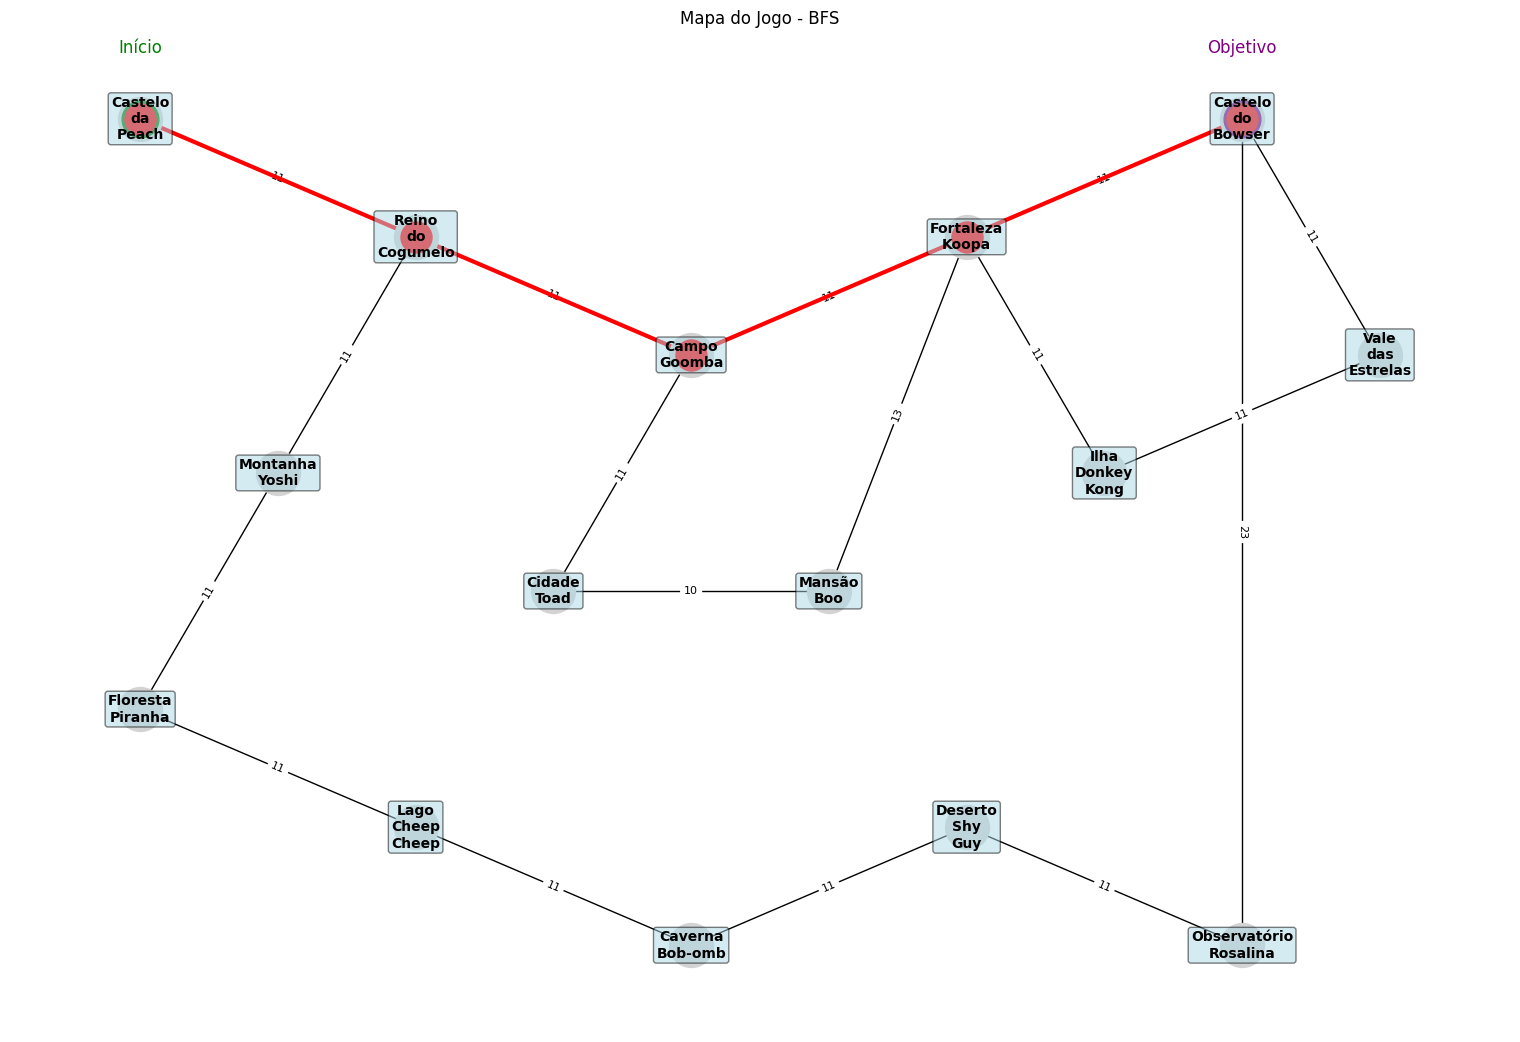

In [252]:
# Efetuando a busca
inicio_heroi = "Castelo da Peach"
objetivo_heroi = "Castelo do Bowser"

caminho_bfs, custo_bfs = bfs_search(G_game, inicio_heroi, objetivo_heroi)

if caminho_bfs:
    print(f"Caminho encontrado: {' -> '.join(caminho_bfs)}")
    print(f"Custo total: {custo_bfs}")
    plot_map(G_game, caminho_bfs, titulo='Mapa do Jogo - BFS')

### Busca em Profundidade (DFS)

In [253]:
def dfs_search(grafo, inicio, objetivo):
    if inicio not in grafo:
        raise KeyError(f"Nó inicial '{inicio}' não existe no grafo.")
    if objetivo not in grafo:
        raise KeyError(f"Nó objetivo '{objetivo}' não existe no grafo.")

    visitados = set()
    pilha = ([(inicio, [inicio], 0)])  # (nó atual, caminho até aqui, custo até aqui)

    while pilha:
        no_atual, caminho, custo_total = pilha.pop()

        if no_atual == objetivo:
            return caminho, custo_total
    
        if no_atual in visitados:
            continue

        visitados.add(no_atual)
        for vizinho in grafo[no_atual]:
            if vizinho not in visitados:
                novo_caminho = caminho + [vizinho]
                novo_custo = custo_total + grafo[no_atual][vizinho]['weight']
                pilha.append((vizinho, novo_caminho, novo_custo))

    return None, float("inf")

Caminho encontrado: Castelo da Peach -> Reino do Cogumelo -> Montanha Yoshi -> Floresta Piranha -> Lago Cheep Cheep -> Caverna Bob-omb -> Deserto Shy Guy -> Observatório Rosalina -> Castelo do Bowser
Custo total: 100


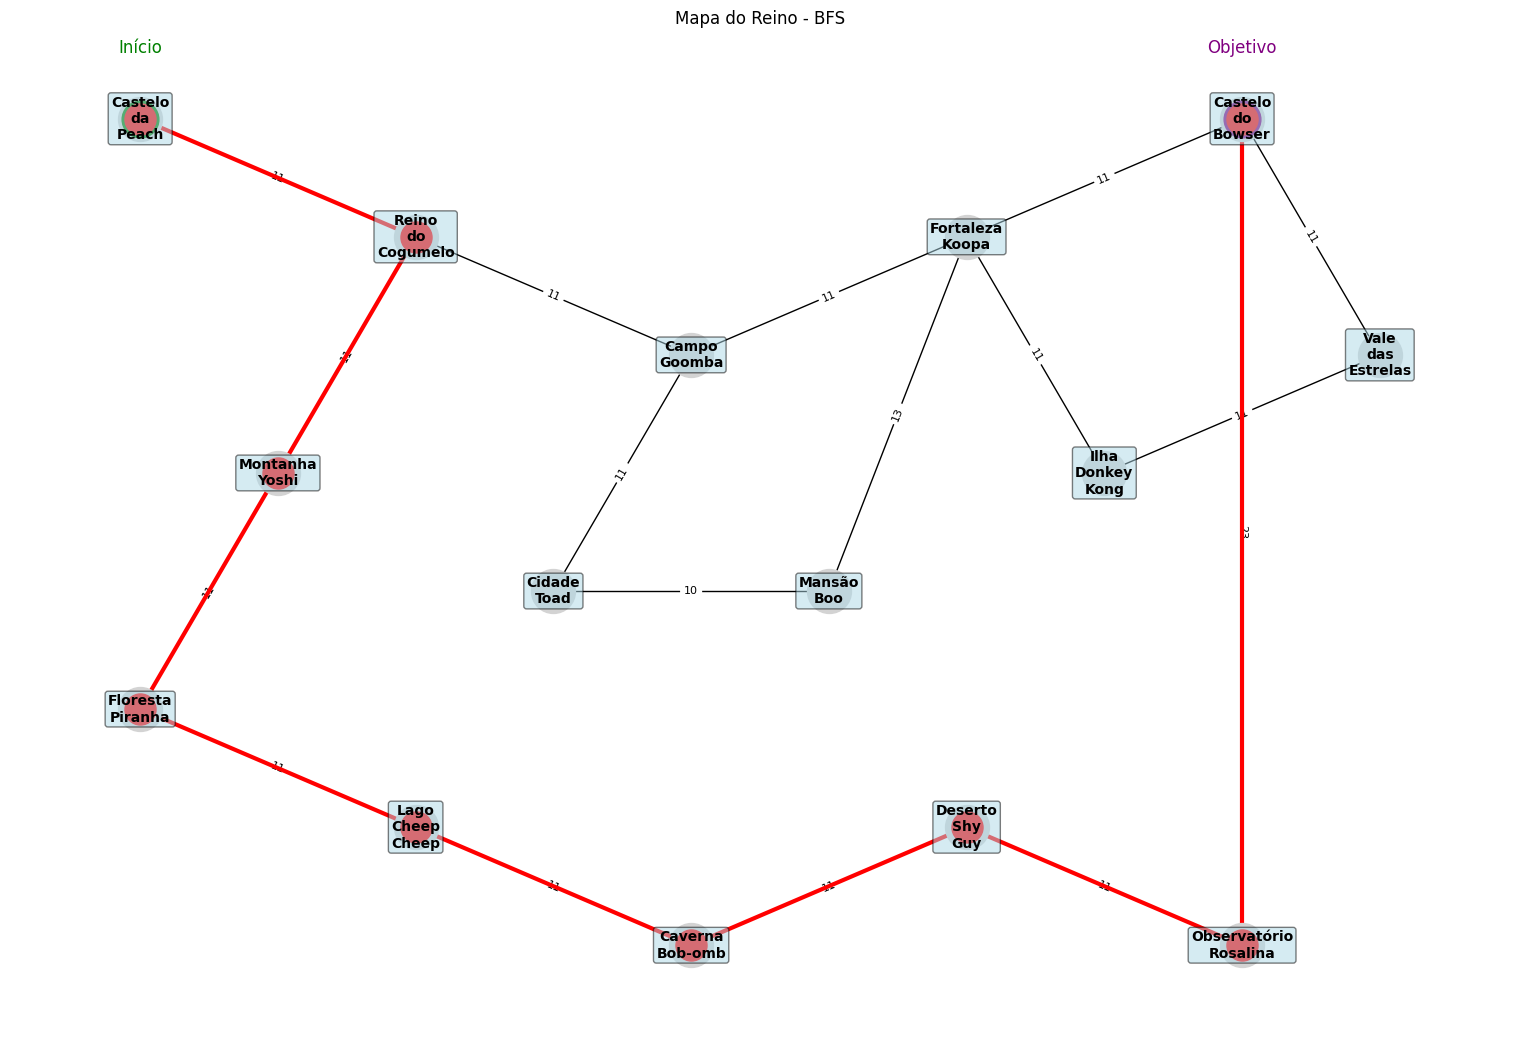

In [254]:
# Efetuação da busca
inicio_heroi = "Castelo da Peach"
objetivo_heroi = "Castelo do Bowser"

caminho_dfs, custo_dfs = dfs_search(G_game, inicio_heroi, objetivo_heroi)

if caminho_dfs:
    print(f"Caminho encontrado: {' -> '.join(caminho_dfs)}")
    print(f"Custo total: {custo_dfs}")
    plot_map(G_game, caminho_dfs, titulo='Mapa do Reino - BFS')

### Busca Gulosa (Greedy)

A **Busca Gulosa** escolhe sempre expandir o nó com **menor heurística h(n)**, ignorando o custo acumulado do caminho.  
Ela **não é ótima** nem **completa** em geral, mas pode ser rápida quando a heurística é informativa.

In [255]:
heuristic_map = {
  "Castelo da Peach": 400,
  "Castelo do Bowser": 0,
  "Reino do Cogumelo": 304,
  "Campo Goomba": 224,
  "Fortaleza Koopa": 112,
  "Montanha Yoshi": 381,
  "Ilha Donkey Kong": 158,
  "Cidade Toad": 320,
  "Mansão Boo": 250,
  "Vale das Estrelas": 112,
  "Lago Cheep Cheep": 424,
  "Deserto Shy Guy": 316,
  "Floresta Piranha": 472,
  "Caverna Bob-omb": 403,
  "Observatório Rosalina": 350
}

In [256]:
def greedy_best_first_search(grafo, inicio, objetivo, heuristica):
    """
    Retorna (caminho, custo) usando Busca Gulosa (Best-First) em um grafo do networkx.
    - grafo: nx.Graph com pesos em 'weight'
    - inicio: nó inicial
    - objetivo: nó objetivo
    - heuristica: dict {no: h(no)} com estimativa do custo até o objetivo
    """
    # Fila de prioridade pela heurística
    fronteira = []
    heapq.heappush(fronteira, (heuristica.get(inicio, float('inf')), inicio))
    
    # Para reconstruir caminho
    veio_de = {inicio: None}
    visitados = set()
    
    while fronteira:
        _, atual = heapq.heappop(fronteira)
        
        if atual in visitados:
            continue
        visitados.add(atual)
        
        if atual == objetivo:
            # Reconstrói caminho
            caminho = []
            no = objetivo
            while no is not None:
                caminho.append(no)
                no = veio_de[no]
            caminho.reverse()
            # Calcula custo acumulado do caminho encontrado (somando 'weight')
            custo = 0
            for a, b in zip(caminho, caminho[1:]):
                custo += grafo[a][b].get('weight', 1)
            return caminho, custo
        
        # Expande vizinhos, ordenando/empilhando por h(n)
        for viz in grafo.neighbors(atual):
            if viz not in visitados and viz not in veio_de:
                veio_de[viz] = atual
                heapq.heappush(fronteira, (heuristica.get(viz, float('inf')), viz))
    
    return None, float('inf')

Caminho (Gulosa): Castelo da Peach -> Reino do Cogumelo -> Campo Goomba -> Fortaleza Koopa -> Castelo do Bowser
Custo total: 44


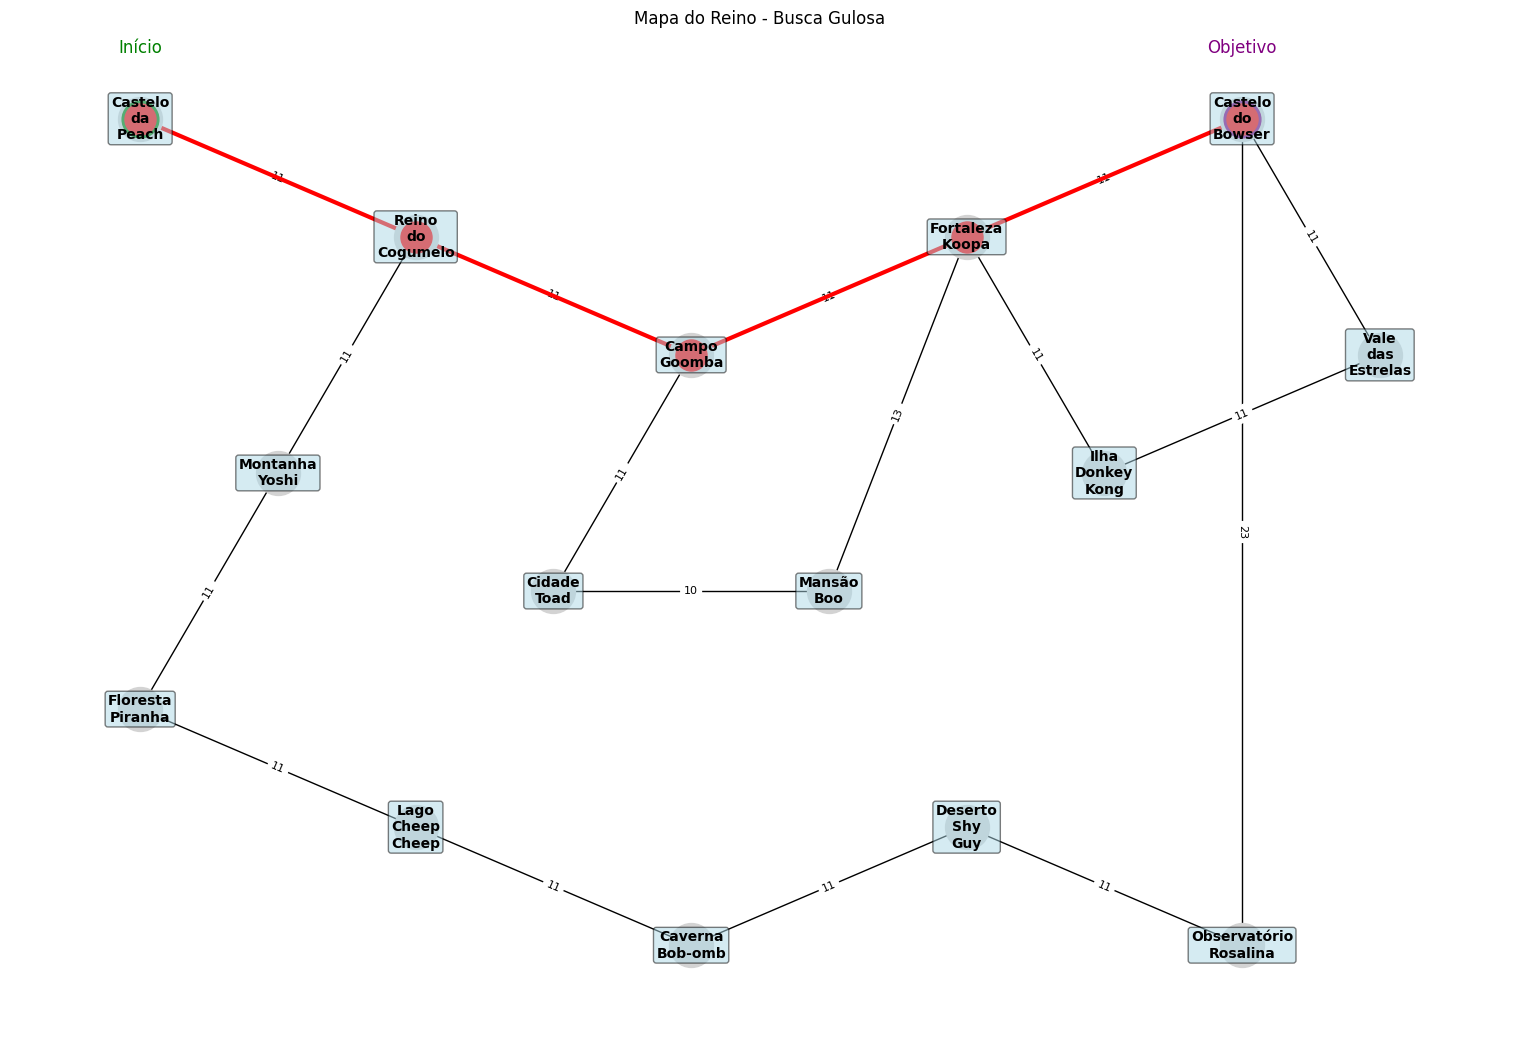

In [ ]:
# Exemplo de uso
inicio = "Castelo da Peach"
objetivo = "Castelo do Bowser"


caminho_gulosa, custo_gulosa = greedy_best_first_search(G_game, inicio, objetivo, heuristic_map)

print("Caminho (Gulosa):", " -> ".join(caminho_gulosa))
print("Custo total:", custo_gulosa)
plot_map(G_game, caminho_gulosa, titulo='Mapa do Reino - Busca Gulosa')